In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lmfit
from analysis_functions import paramagnon, lorz



[[Model]]
    Model(paramagnon)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 36
    # data points      = 500
    # variables        = 4
    chi-square         = 3.2026e-29
    reduced chi-square = 6.4569e-32
    Akaike info crit   = -35904.8059
    Bayesian info crit = -35887.9475
    R-squared          = 1.00000000
[[Variables]]
    amplitude:  0.28977865 +/- 9.9024e-18 (0.00%) (init = 1)
    center:     0.36249138 +/- 6.0675e-18 (0.00%) (init = 0.33)
    sigma:      0.30000000 +/- 3.0507e-17 (0.00%) (init = 0.1)
    res:        0.03609618 +/- 2.4349e-17 (0.00%) (init = 0.1)
    kBT:        0.0017234 (fixed)
[[Correlations]] (unreported correlations are < 0.100)
    C(sigma, res)        = -0.908
    C(center, sigma)     = 0.843
    C(amplitude, sigma)  = 0.832
    C(center, res)       = -0.787
    C(amplitude, center) = 0.687
    C(amplitude, res)    = -0.642


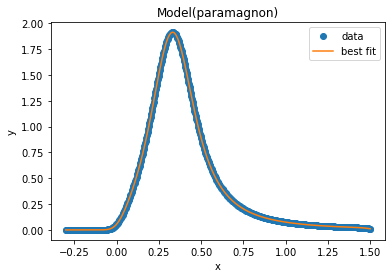

In [5]:
x = np.linspace(-.3, 1.5, 500)
center = 0.33
amplitude = 1
sigma = .3/2  #HWHM
res = 0.085/(2*np.sqrt(2*np.log(2)))
kBT = 20*8.617e-5

y = lorz(x, amplitude=amplitude, center=center, sigma=sigma, kBT=kBT, res=res)
magmodel = lmfit.Model(paramagnon)
params = magmodel.make_params()
params['kBT'].set(value=kBT, vary=False)
params['center'].set(min=.001, value=center)

result = magmodel.fit(y, x=x, params=params)

result.plot_fit()

print(result.fit_report())

In [3]:
params

name,value,initial value,min,max,vary
amplitude,1.00000000,None,-inf,inf,True
center,0.33000000,None,1.0000e-03,inf,True
sigma,0.10000000,None,-inf,inf,True
res,0.10000000,None,-inf,inf,True
kBT,0.00172340,None,-inf,inf,False
